In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch 
import plotly.express as px
from pandas import Series
import seaborn as sns
from datetime import datetime

In [2]:
def parse(x):
    try:
        return datetime.strptime(x, "%m/%d/%Y %H:%M")
    except ValueError:
        # If the time part is not present, parse only the date
        return datetime.strptime(x, "%m/%d/%Y")

In [3]:
df = pd.read_csv('raw_sales.csv', parse_dates=['datesold'], date_parser=parse)

C:\Users\Aryan raina\AppData\Local\Temp\ipykernel_20856\694728232.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('raw_sales.csv', parse_dates=['datesold'], date_parser=parse)


In [4]:
df['datesold']=pd.to_datetime(df['datesold'])

In [5]:
df.drop(columns=['propertyType','postcode','bedrooms','Unnamed: 5',	'Unnamed: 6',	'Unnamed: 7',	'Unnamed: 8'],inplace=True)

In [6]:
df.set_index('datesold',inplace=True)
df=df['price'].resample('MS').mean()

In [7]:
df=df.reset_index()

In [8]:
df

datesold          price
0   2007-02-01  407500.000000
1   2007-03-01  339333.333333
2   2007-04-01  798000.000000
3   2007-05-01  339500.000000
4   2007-06-01  520333.333333
..         ...            ...
145 2019-03-01  651666.737288
146 2019-04-01  655325.561321
147 2019-05-01  641491.136364
148 2019-06-01  703275.396825
149 2019-07-01  583192.056000

[150 rows x 2 columns]

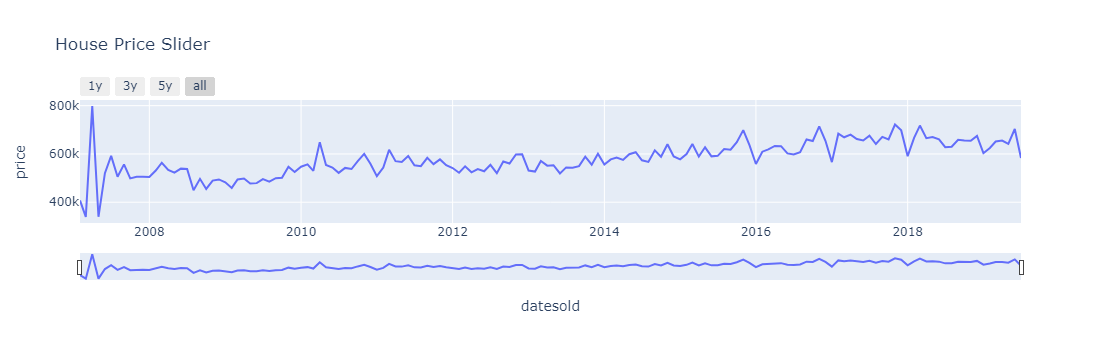

In [9]:
fig=px.line(df,x='datesold',y='price',title='House Price Slider')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1,label='1y',step='year',stepmode='backward'),
            dict(count=2,label='3y',step='year',stepmode='backward'),
            dict(count=3,label='5y',step='year',stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

In [10]:
df.reset_index(drop=True,inplace=True)

In [11]:
import statsmodels.api as sm
res=sm.tsa.seasonal_decompose(df['price'],model='additative',period=12)

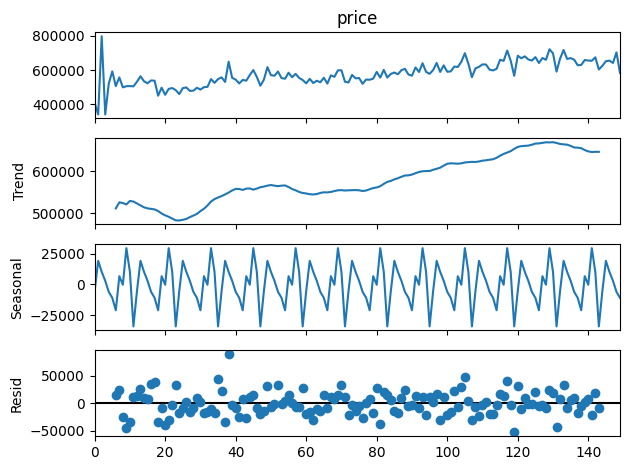

In [12]:
res.plot()
plt.show()

<Axes: xlabel='datesold'>

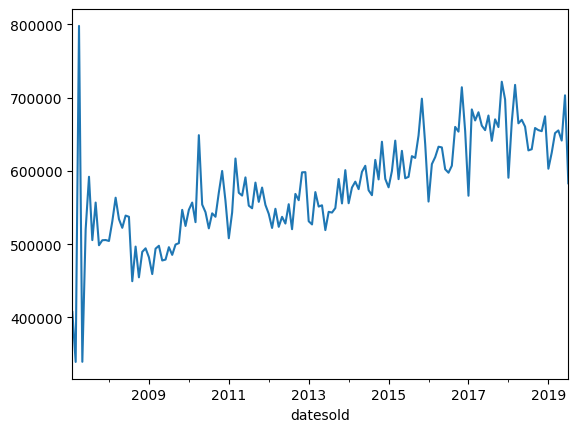

In [13]:
df.set_index('datesold',inplace=True)
df['price'].plot()

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
results=adfuller(df['price'])
print("P-value:-",results[1])
if results[1] <=0.05:
    print("Reject the Null hypothesis.Time series is stationary")
else:
    print("Failed to reject the Null hypothesis.Time series is not stationary.")

P-value:- 0.8567877254659428
Failed to reject the Null hypothesis.Time series is not stationary.


In [16]:
df=df.reset_index().sort_values('datesold')

In [17]:
df=df.set_index('datesold')
df['10 days mean']=df['price'].rolling(10).mean()

<Axes: xlabel='datesold'>

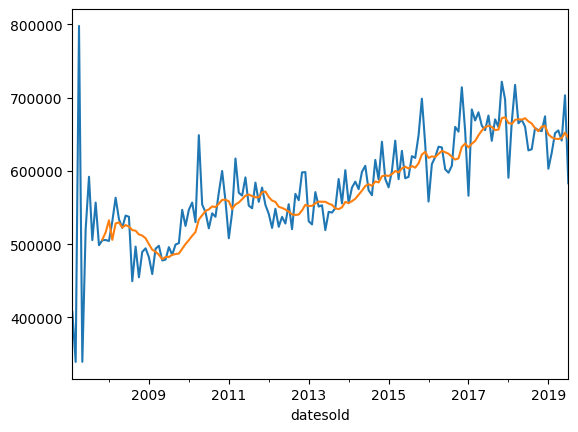

In [18]:
df['price'].plot()
df['10 days mean'].plot()

<Axes: xlabel='datesold'>

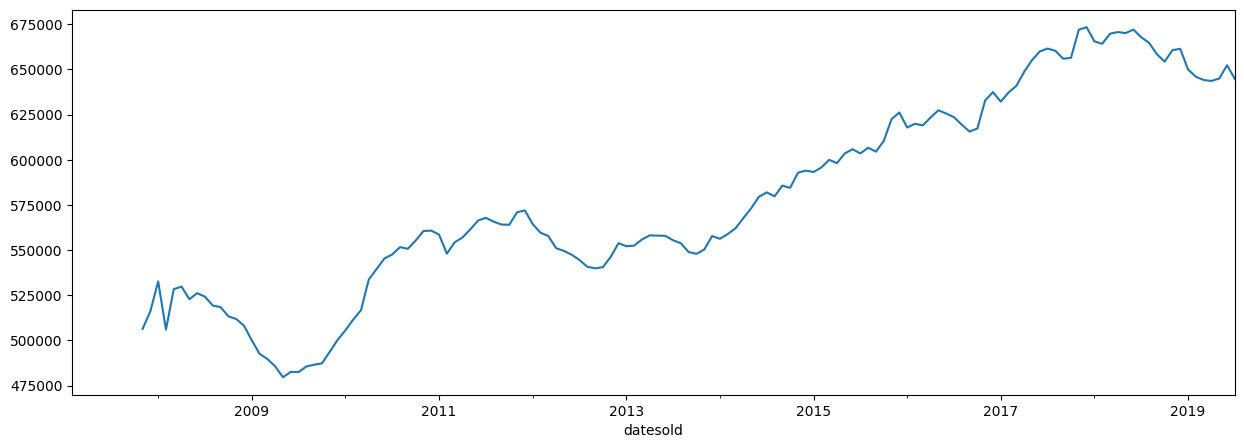

In [19]:
df['10 days mean'].plot(figsize=(15,5))

In [20]:
df['50 days mean']=df['price'].rolling(50).mean()

<Axes: xlabel='datesold'>

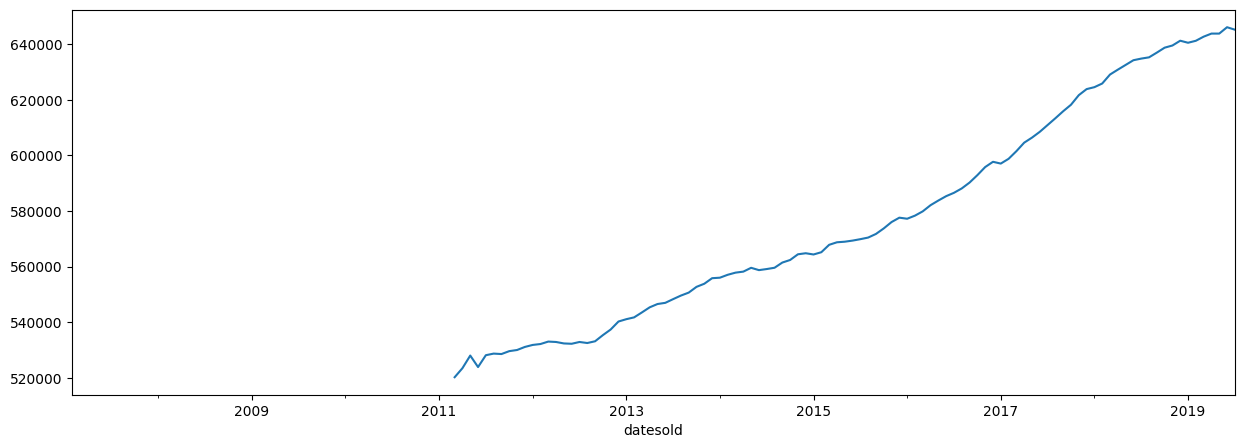

In [21]:
df['50 days mean'].plot(figsize=(15,5))

In [22]:
df['100 days mean']=df['price'].rolling(100).mean()

<Axes: xlabel='datesold'>

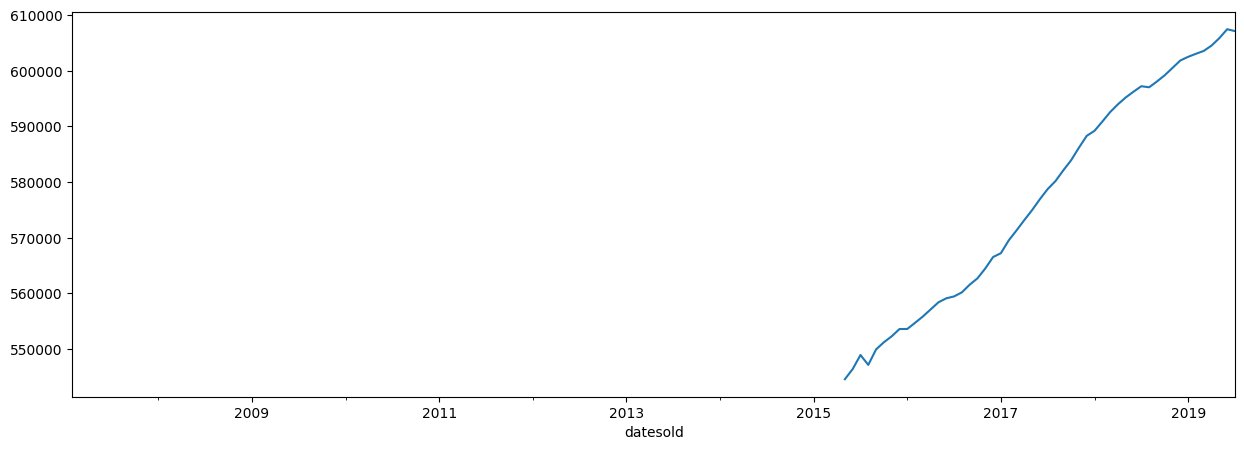

In [23]:
df['100 days mean'].plot(figsize=(15,5))

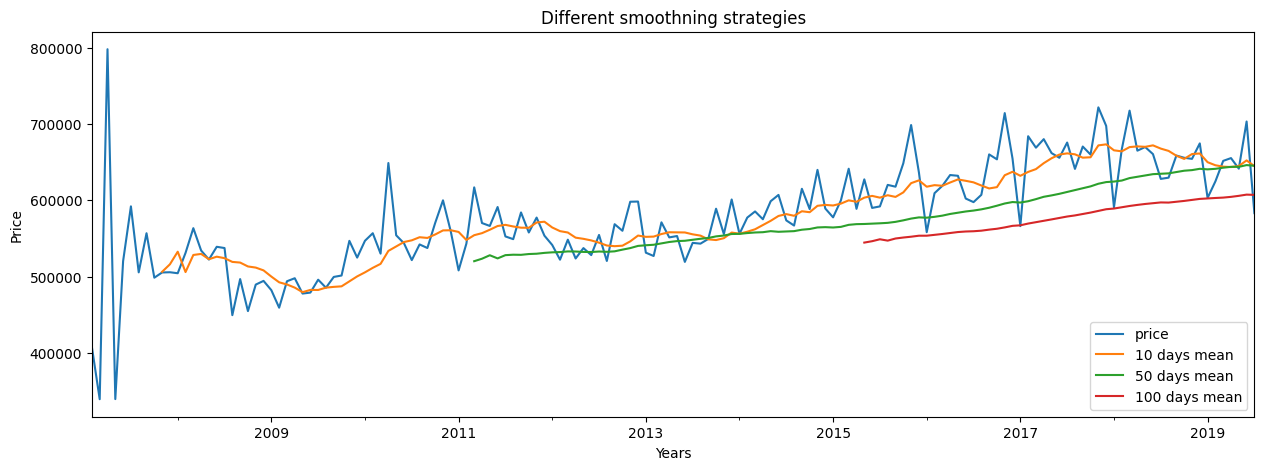

In [24]:
df['price'].plot(figsize=(15,5))
df['10 days mean'].plot(figsize=(15,5))
df['50 days mean'].plot(figsize=(15,5))
df['100 days mean'].plot(figsize=(15,5))
plt.legend()
plt.xlabel('Years')
plt.ylabel('Price')
plt.title("Different smoothning strategies")
plt.show()

In [25]:
new=df['price'].diff()
new=new.reset_index().dropna()
results=adfuller(new['price'])
print("P-value:-",results[1])
if results[1] <=0.05:
    print("Reject the Null hypothesis.Time series is stationary")
else:
    print("Failed to reject the Null hypothesis.Time series is not stationary.")

P-value:- 5.3780162327664975e-06
Reject the Null hypothesis.Time series is stationary


In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

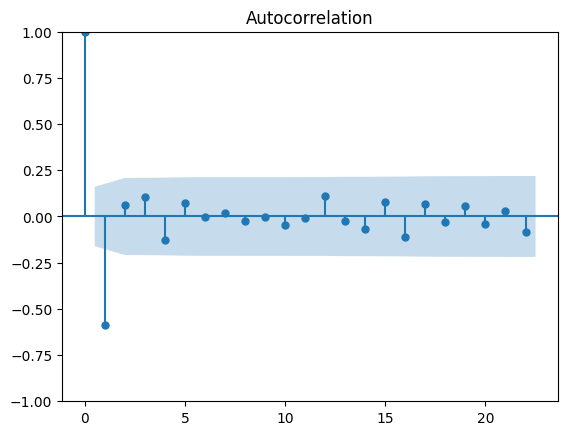

In [27]:
plot_acf(new['price'])
plt.show()

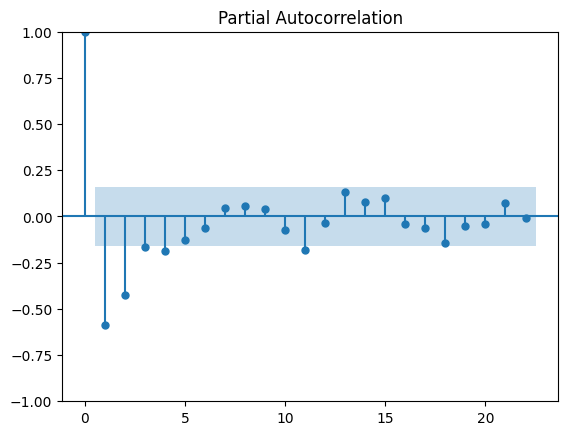

In [28]:
plot_pacf(new['price'])
plt.show()

In [29]:
sns.boxplot(data=df,x='propertyType',y='price',hue='propertyType')

ValueError: Could not interpret value `propertyType` for `x`. An entry with this name does not appear in `data`.

In [ ]:
sns.boxplot(data=df,x='bedrooms',y='price',hue='propertyType')

<Axes: ylabel='price'>

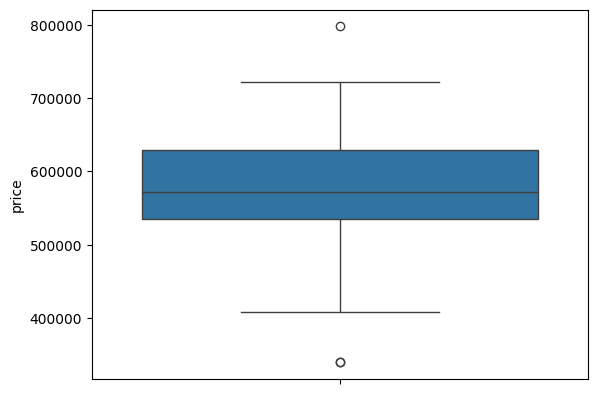

In [30]:
sns.boxplot(df['price'])

<Axes: xlabel='price', ylabel='Count'>

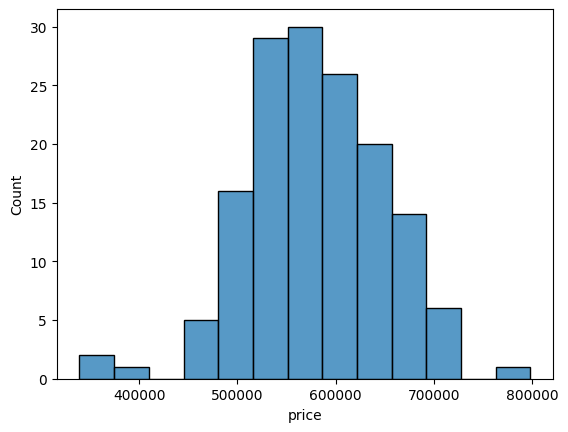

In [31]:
sns.histplot(df['price'])

In [32]:
def outliers_thresholds(df,column,q1=0.25,q3=0.75):
    quartile1=df[column].quantile(q1)
    quartile3=df[column].quantile(q3)
    IQR=quartile3-quartile1
    upper_limit=quartile3+1.5*IQR
    lower_limit=quartile1-1.5*IQR
    return lower_limit,upper_limit
def handle_outliers(df,column):
    lower_limit,upper_limit=outliers_thresholds(df,column)
    df.loc[(df[column]<lower_limit),column]=lower_limit
    df.loc[(df[column]>upper_limit),column]=upper_limit
def check_outliers(df,column,q1=0.25,q3=0.75):
    lower_limit,upper_limit=outliers_thresholds(df,column,q1,q3)
    if df[(df[column]<lower_limit)|(df[column]>upper_limit)].any(axis=None):
        return True
    else:
        return False

In [33]:
check_outliers(df,'price')

True

In [34]:
handle_outliers(df,'price')

In [35]:
for cols in df[['price','bedrooms']]:
    print(check_outliers(df,cols))

KeyError: "['bedrooms'] not in index"

<Axes: ylabel='price'>

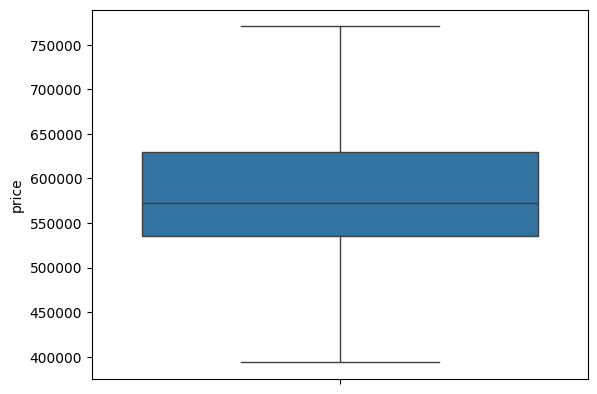

In [36]:
sns.boxplot(df['price'])

<Axes: xlabel='price', ylabel='Count'>

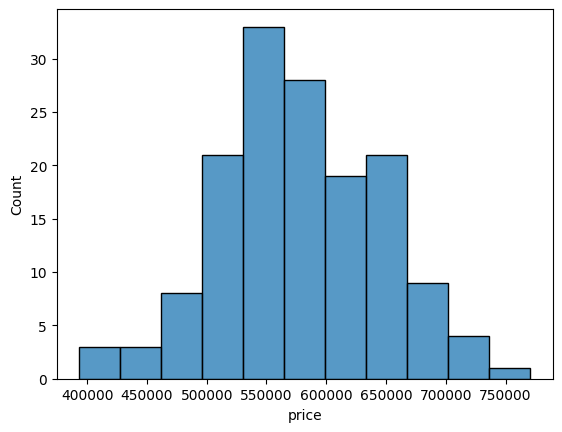

In [37]:
sns.histplot(df['price'])

In [38]:
df

price   10 days mean   50 days mean  100 days mean
datesold                                                              
2007-02-01  407500.000000            NaN            NaN            NaN
2007-03-01  393576.901978            NaN            NaN            NaN
2007-04-01  770704.351178            NaN            NaN            NaN
2007-05-01  393576.901978            NaN            NaN            NaN
2007-06-01  520333.333333            NaN            NaN            NaN
...                   ...            ...            ...            ...
2019-03-01  651666.737288  644117.301284  642750.303521  603564.183856
2019-04-01  655325.561321  643596.985393  643859.166948  604526.118524
2019-05-01  641491.136364  644938.699700  643860.915740  605859.623790
2019-06-01  703275.396825  652297.831462  646149.857212  607459.032930
2019-07-01  583192.056000  644752.297616  645264.668746  607120.968521

[150 rows x 4 columns]

In [39]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoded=OneHotEncoder(sparse_output=False,drop='first')
encoded_pt=encoded.fit_transform(df[['propertyType']])
encoded_col_name=encoded.get_feature_names_out(['propertyType'])

In [ ]:
encoded_df=pd.DataFrame(encoded_pt,columns=encoded_col_name)

In [ ]:
encoded_df.index=df.index

In [ ]:
new_df=pd.concat([df,encoded_df],axis=1)

In [ ]:
new_df.drop(columns='propertyType',inplace=True)

In [40]:
split_date=pd.to_datetime('2018-01-01')

In [41]:
new.set_index('datesold',inplace=True)

In [42]:
train=df.loc[df.index <=split_date]
test=df.loc[df.index > split_date]

In [43]:
print(train)
print(test)

                    price   10 days mean   50 days mean  100 days mean
datesold                                                              
2007-02-01  407500.000000            NaN            NaN            NaN
2007-03-01  393576.901978            NaN            NaN            NaN
2007-04-01  770704.351178            NaN            NaN            NaN
2007-05-01  393576.901978            NaN            NaN            NaN
2007-06-01  520333.333333            NaN            NaN            NaN
...                   ...            ...            ...            ...
2017-09-01  670468.142119  655884.114493  615927.760655  582118.252617
2017-10-01  659916.747525  656416.370963  618261.922040  583926.888274
2017-11-01  721804.684701  671977.814433  621710.843760  586185.114538
2017-12-01  697552.703125  673335.222363  623882.158428  588305.982691
2018-01-01  590753.808140  665513.951781  624583.102374  589217.548984

[132 rows x 4 columns]
                    price   10 days mean   50 days me

In [44]:
exog=train[['postcode','propertyType_unit','bedrooms']]

KeyError: "None of [Index(['postcode', 'propertyType_unit', 'bedrooms'], dtype='object')] are in the [columns]"

In [45]:
model=ARIMA(train['price'],order=(2,1,1))

C:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [46]:
model_fit=model.fit()

In [47]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                  132
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1654.208
Date:                Thu, 13 Jun 2024   AIC                           3316.415
Time:                        09:44:59   BIC                           3327.916
Sample:                    02-01-2007   HQIC                          3321.089
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7505      0.220     -3.418      0.001      -1.181      -0.320
ar.L2         -0.0862      0.090     -0.956      0.339      -0.263       0.090
ma.L1          0.3766      0.229      1.647      0.100      -0.072       0.825
sigma2      1.149e+09   5.52e-11   2.08e+19      0.000    1.15e+09    1.15e+09
===================================================================================
Ljung-Box (L1) (Q):                   2.74   Jarque-Bera (JB):              1034.98
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                             1.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.05e+35. Standard errors may be unstable.
"""

In [48]:
start_date = test.index[0].strftime('%Y-%m-%d')
end_date = test.index[-1].strftime('%Y-%m-%d')
pred = model_fit.predict(start=start_date, end=end_date)

In [49]:
pred

2018-02-01    627870.798369
2018-03-01    609218.238403
2018-04-01    620018.225325
2018-05-01    613520.341766
2018-06-01    617466.240209
2018-07-01    615064.843764
2018-08-01    616527.026462
2018-09-01    615636.615454
2018-10-01    616178.855110
2018-11-01    615848.641635
2018-12-01    616049.735559
2019-01-01    615927.273022
2019-02-01    616001.850483
2019-03-01    615956.434163
2019-04-01    615984.091877
2019-05-01    615967.248831
2019-06-01    615977.505940
2019-07-01    615971.259547
Freq: MS, Name: predicted_mean, dtype: float64

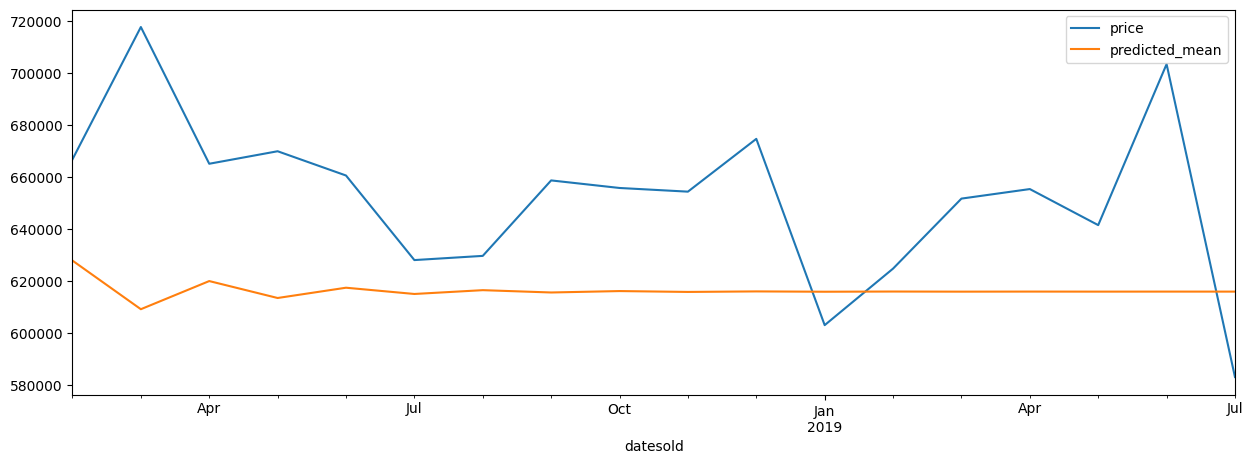

In [50]:
test['price'].plot(figsize=(15,5))
pred.plot(figsize=(15,5))
plt.legend()
plt.show()

In [51]:
len(test)

18

In [52]:
future_steps = 12
forecast = model_fit.forecast(steps=future_steps)
forecast_index = pd.date_range(start=test.index[-1], periods=future_steps+1, freq='MS')[1:]

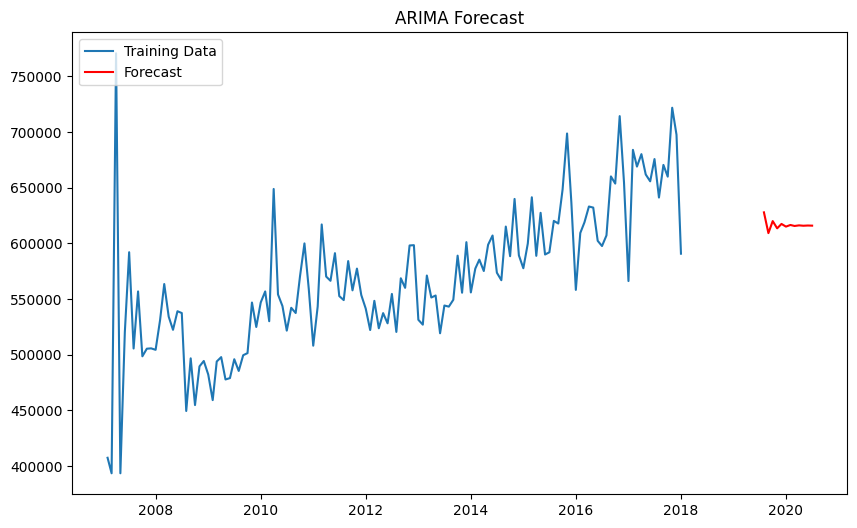

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['price'], label='Training Data')
#plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.legend(loc='upper left')
plt.title('ARIMA Forecast')
plt.show()

In [54]:
def mape(actual, pred): 
    """
    Calculate Mean Absolute Percentage Error (MAPE)
    """
    # Check if lengths of actual and pred arrays are the same
    if len(actual) != len(pred):
        raise ValueError("Lengths of actual and predicted arrays must be the same.")
    
    # Create boolean mask to avoid division by zero
    mask = actual != 0
    
    # Apply boolean mask and calculate MAPE
    return np.mean(np.abs((actual[mask] - pred[mask]) / actual[mask])) * 100

# Calculate MAPE
mape_value = mape(test['price'].values, pred.values)
print("MAPE:", mape_value)

MAPE: 6.163021796255603


In [55]:
len(test['price'])

18

In [56]:
len(pred)

18

In [57]:
from sklearn.metrics import mean_absolute_percentage_error

In [58]:
pred.values

array([627870.79836901, 609218.23840344, 620018.2253248 , 613520.34176595,
       617466.24020889, 615064.84376405, 616527.02646219, 615636.61545395,
       616178.85511023, 615848.64163537, 616049.73555889, 615927.27302169,
       616001.85048257, 615956.4341626 , 615984.09187719, 615967.24883095,
       615977.50594044, 615971.25954691])

In [59]:
mean_absolute_percentage_error(test['price'].values,pred.values)

0.06163021796255603

In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [61]:
train

price   10 days mean   50 days mean  100 days mean
datesold                                                              
2007-02-01  407500.000000            NaN            NaN            NaN
2007-03-01  393576.901978            NaN            NaN            NaN
2007-04-01  770704.351178            NaN            NaN            NaN
2007-05-01  393576.901978            NaN            NaN            NaN
2007-06-01  520333.333333            NaN            NaN            NaN
...                   ...            ...            ...            ...
2017-09-01  670468.142119  655884.114493  615927.760655  582118.252617
2017-10-01  659916.747525  656416.370963  618261.922040  583926.888274
2017-11-01  721804.684701  671977.814433  621710.843760  586185.114538
2017-12-01  697552.703125  673335.222363  623882.158428  588305.982691
2018-01-01  590753.808140  665513.951781  624583.102374  589217.548984

[132 rows x 4 columns]

In [62]:
model = SARIMAX(train['price'], order=(2, 1, 1), seasonal_order=(2, 0, 1, 12))
model_fit = model.fit(disp=False)

C:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [63]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              price   No. Observations:                  132
Model:             SARIMAX(2, 1, 1)x(2, 0, 1, 12)   Log Likelihood               -1633.450
Date:                            Thu, 13 Jun 2024   AIC                           3280.901
Time:                                    09:45:26   BIC                           3301.027
Sample:                                02-01-2007   HQIC                          3289.079
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8056      0.039    -20.886      0.000      -0.881      -0.730
ar.L2         -0.1077      0.018     -6.013      0.000      -0.143      -0.073
ma.L1          0.3902      0.044      8.784      0.000       0.303       0.477
ar.S.L12       1.0952      0.017     63.105      0.000       1.061       1.129
ar.S.L24      -0.0953      0.017     -5.720      0.000      -0.128      -0.063
ma.S.L12      -0.9925      0.045    -22.265      0.000      -1.080      -0.905
sigma2      1.149e+09    4.3e-11   2.67e+19      0.000    1.15e+09    1.15e+09
===================================================================================
Ljung-Box (L1) (Q):                   2.36   Jarque-Bera (JB):              1000.03
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               0.22   Skew:                             1.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.91e+35. Standard errors may be unstable.
"""

In [64]:
pred1=model_fit.predict(start=test.index[0],end=test.index[-1])

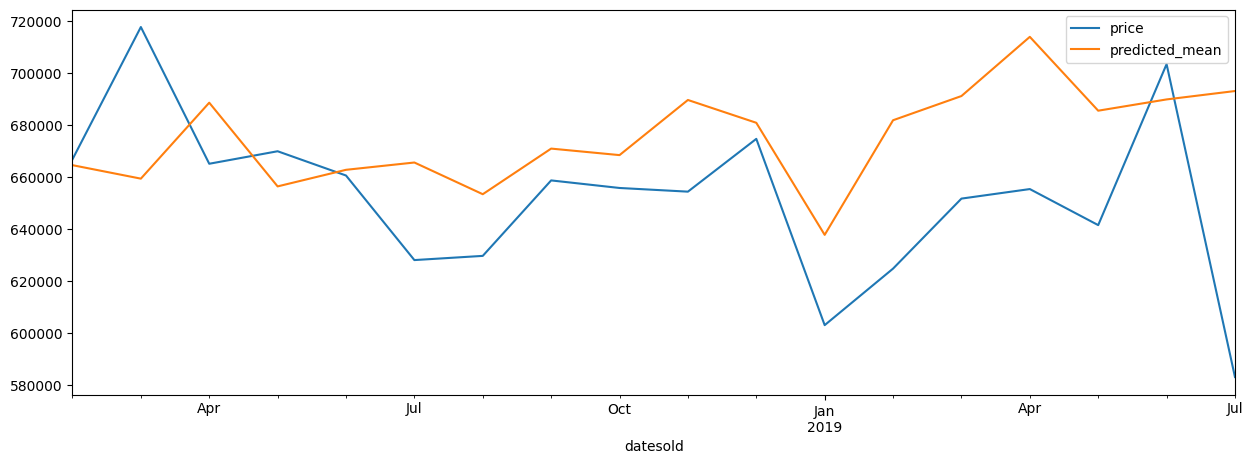

In [65]:
test['price'].plot(figsize=(15,5))
pred1.plot(figsize=(15,5))
plt.legend()
plt.show()

In [66]:
def mape(actual, pred): 
    """
    Calculate Mean Absolute Percentage Error (MAPE)
    """
    # Check if lengths of actual and pred arrays are the same
    if len(actual) != len(pred):
        raise ValueError("Lengths of actual and predicted arrays must be the same.")
    
    # Create boolean mask to avoid division by zero
    mask = actual != 0
    
    # Apply boolean mask and calculate MAPE
    return np.mean(np.abs((actual[mask] - pred[mask]) / actual[mask])) * 100

# Calculate MAPE
mape_value = mape(test['price'].values, pred1.values)
print("MAPE:", mape_value)

MAPE: 5.083906932788692


In [67]:
mean_absolute_percentage_error(test['price'].values,pred1.values)

0.05083906932788693

In [68]:
future_steps = 12*3
forecast1 = model_fit.forecast(steps=future_steps)
forecast_index1 = pd.date_range(start=test.index[-1], periods=future_steps+1, freq='MS')[1:]

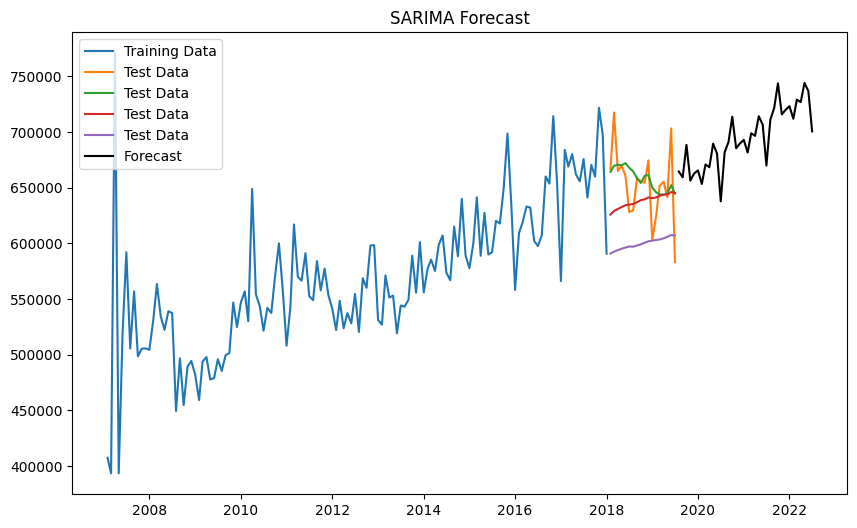

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['price'], label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_index1, forecast1, label='Forecast', color='black')
plt.legend(loc='upper left')
plt.title('SARIMA Forecast')
plt.show()

In [70]:
from pmdarima import auto_arima

In [73]:
sarima_model = auto_arima(train['price'], start_p=0, start_q=0,
                      max_p=12, max_q=12,
                      m=12,             
                      d=None,             
                      start_P=1,
                      start_Q=1,
                      max_P=10,
                      max_Q=10,
                      test='adf', # use adftest to find optimal 'd'
                      D=None, 
                      seasonal=True,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=False,
                      information_criterion='aic')

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3265.181, Time=0.05 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=3263.882, Time=0.36 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=3265.792, Time=0.82 sec
 ARIMA(0,1,0)(0,0,3)[12] intercept   : AIC=3260.602, Time=3.90 sec
 ARIMA(0,1,0)(0,0,4)[12] intercept   : AIC=3261.482, Time=6.16 sec
 ARIMA(0,1,0)(0,0,5)[12] intercept   : AIC=3263.245, Time=9.82 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=3263.829, Time=0.39 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=3263.829, Time=0.82 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=3265.664, Time=1.20 sec
 ARIMA(0,1,0)(1,0,3)[12] intercept   : AIC=3261.370, Time=10.81 sec
 ARIMA(0,1,0)(1,0,4)[12] intercept   : AIC=3263.314, Time=6.51 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=3265.611, Time=0.85 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=3265.727, Time=1.61 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=3265.422, Time=1.88 sec
 ARIMA(0,1,0)(2,0,3)[12] intercept   : AIC=3263.292, Time=8.6

In [74]:
model = SARIMAX(train['price'], order=(1, 1, 0), seasonal_order=(3, 0, 0, 12))
model_fit = model.fit(disp=False)

C:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [75]:
pred1=model_fit.predict(start=test.index[0],end=test.index[-1])

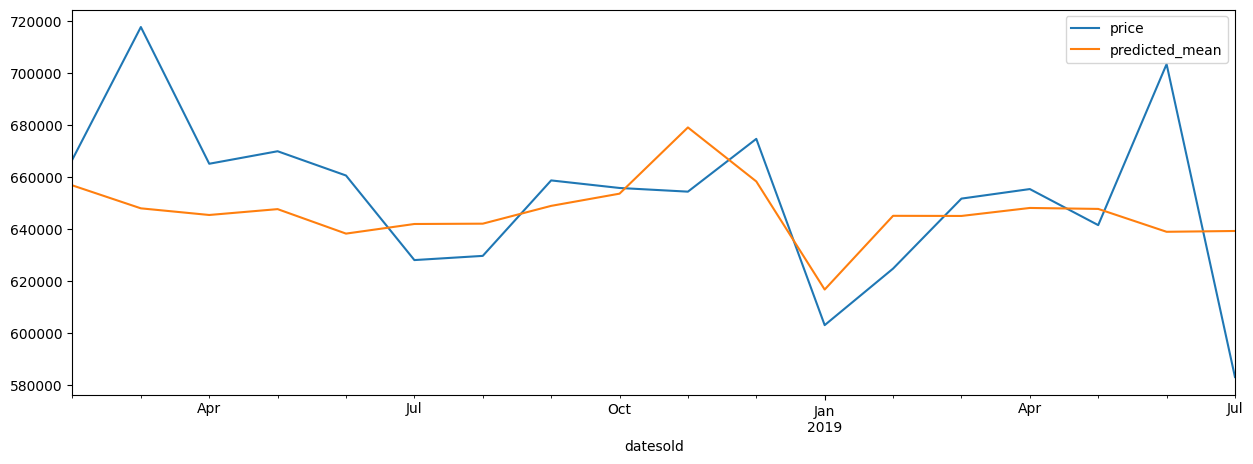

In [76]:
test['price'].plot(figsize=(15,5))
pred1.plot(figsize=(15,5))
plt.legend()
plt.show()

In [77]:
mean_absolute_percentage_error(test['price'].values,pred1.values)

0.033546744645938334

In [87]:
future_steps = 12*3
forecast1 = model_fit.forecast(steps=future_steps)
forecast_index1 = pd.date_range(start=test.index[-1], periods=future_steps+1, freq='MS')[1:]

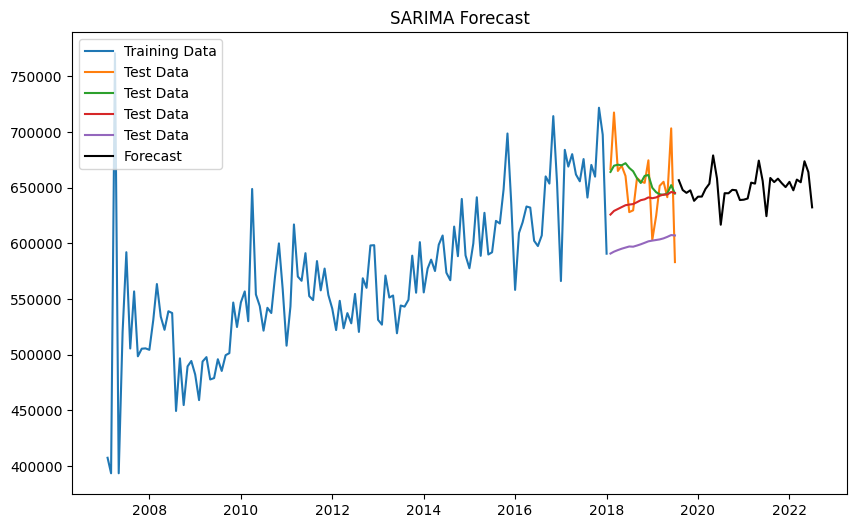

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['price'], label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_index1, forecast1, label='Forecast', color='black')
plt.legend(loc='upper left')
plt.title('SARIMA Forecast')
plt.show()